# Capstone Project 

This notebook will be used for doing the capstone project for IBM Data Science Professional Certificate

@Author: Prasenjit Das

@Date: 05/07/2020

In [1]:
import pandas as pd
import numpy as np

In [2]:
import urllib.request

# Part 1: Using Beautiful Soup to scrap the Wikipedia Page

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)

In [4]:
from bs4 import BeautifulSoup

In [5]:
soup = BeautifulSoup(page, "lxml")

Checking the structure of the wikipedia page

In [6]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of postal codes of Canada: M - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"479b3d2f-bc7f-4044-86f3-9ed22000dfea","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":960187814,"wgRevisionId":960187814,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canad

In [7]:
# TITLE OF THE PAGE 
soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [8]:
all_tables=soup.find_all("table")

Finding the correct table needed by its class name 

In [9]:
right_table=soup.find('table', class_='wikitable sortable')

In [10]:
PsCode=[]
Borough=[]
Neigh=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        PsCode.append(cells[0].find(text=True))
        Borough.append(cells[1].find(text=True))
        Neigh.append(cells[2].find(text=True))

Converting the table to a dataframe

In [11]:
df=pd.DataFrame(PsCode,columns=["Postal Code"])
df["Borough"]=Borough
df["Neighbourhood"]=Neigh
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [12]:
df['Neighbourhood'].value_counts()

Not assigned
                                                                                                                              77
Downsview
                                                                                                                                  4
Don Mills
                                                                                                                                  2
Moore Park, Summerhill East
                                                                                                                1
Leaside
                                                                                                                                    1
University of Toronto, Harbord
                                                                                                             1
Willowdale, Newtonbrook
                                                                                                                    1
Busine

In [13]:
df['Borough'].value_counts()

Not assigned
        77
North York
          24
Downtown Toronto
    19
Scarborough
         17
Etobicoke
           12
Central Toronto
      9
West Toronto
         6
York
                 5
East Toronto
         5
East York
            5
Mississauga
          1
Name: Borough, dtype: int64

## After inspection of the table, it is found that only neighbourhoods that have a "No Assinged" value in their respective Borough also have a "Non Assigend" value for Neighbourhood. Therefore, we can only remove the items that have a "Non Assigned" value in their Borough. 

In [14]:
df=df[~df.Borough.str.contains("Not assigned")]
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [15]:
#Shape of the dataframe df
df.shape

(103, 3)

# Part 2 - Getting Coordinates

In [16]:
# installing geocoder
#!pip install geocoder

In [17]:
#importing geocoder
import geocoder

In [18]:
#### trying to use geocoder 

# latitude=[]
# longitude=[]
# postal_code = df["Postal Code"].tolist()
# # loop until you get the coordinates
# for i in range(len(df)):
#     lat_lng_coords = None
#     while(lat_lng_coords is None):
#         g = geocoder.google('{}, Toronto, Ontario'.format(postal_code[i]))
#         lat_lng_coords = g.latlng
#     print("Coordinates Found for ", i, " as ",lat_lng_coords[0],lat_lng_coords[1])

#     latitude.append(lat_lng_coords[0])
#     longitude.append(lat_lng_coords[1])
# df_coor=pd.DataFrame({'Postal Code': postal_code, 'Latitude': latitude,'Longitude': longitude })

# result = df.merge(df_coor, on='Postal Code', how = 'inner')
# result


Even after multiple tries in useing geocoder, it was not returning the latitude and longitude values. Therefore, the give postal code dataset is used. 

In [19]:
postal_data = pd.read_csv('http://cocl.us/Geospatial_data')

postal_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [20]:
df['Postal Code']=df['Postal Code'].str.replace('\n','')

In [21]:
#merge the two dataframes based on 'Postal Code' to create the required table
results = pd.merge(df, postal_data, on='Postal Code')
results.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [43]:
results.shape

(103, 5)

# Part 3 - Clustering and Visualization 

In [22]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [23]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
import requests

In [24]:
CLIENT_ID = '4RENOUD2GEQCX2VTRHXP2KY2AZQPXP4W0KXEIMXOLKB502EW' # your Foursquare ID
CLIENT_SECRET = 'XA0XM34GFFQM0WG3TDBET0QPP5DATNJBXDTS2QAVQCGWWBBN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4RENOUD2GEQCX2VTRHXP2KY2AZQPXP4W0KXEIMXOLKB502EW
CLIENT_SECRET:XA0XM34GFFQM0WG3TDBET0QPP5DATNJBXDTS2QAVQCGWWBBN


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        result = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in result])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:

torronto_venues = getNearbyVenues(names=results['Neighbourhood'],
                                   latitudes=results['Latitude'],
                                   longitudes=results['Longitude']
                                  )


Parkwoods

Victoria Village

Regent Park, Harbourfront

Lawrence Manor, Lawrence Heights

Queen's Park, Ontario Provincial Government

Islington Avenue, Humber Valley Village

Malvern, Rouge

Don Mills

Parkview Hill, Woodbine Gardens

Garden District, Ryerson

Glencairn

West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale

Rouge Hill, Port Union, Highland Creek

Don Mills

Woodbine Heights

St. James Town

Humewood-Cedarvale

Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood

Guildwood, Morningside, West Hill

The Beaches

Berczy Park

Caledonia-Fairbanks

Woburn

Leaside

Central Bay Street

Christie

Cedarbrae

Hillcrest Village

Bathurst Manor, Wilson Heights, Downsview North

Thorncliffe Park

Richmond, Adelaide, King

Dufferin, Dovercourt Village

Scarborough Village

Fairview, Henry Farm, Oriole

Northwood Park, York University

East Toronto, Broadview North (Old East York)

Harbourfront East, Union Station, Toronto Islands

Little Portugal, Trinit

In [27]:
print(torronto_venues.shape)
torronto_venues.head()

(1333, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [28]:
torronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,30,30,30,30,30,30
"Birch Cliff, Cliffside West",5,5,5,5,5,5
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",20,20,20,20,20,20


In [29]:
print('There are {} uniques categories.'.format(len(torronto_venues['Venue Category'].unique())))

There are 239 uniques categories.


In [30]:
# one hot encoding
torronto_onehot = pd.get_dummies(torronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
torronto_onehot['Neighbourhood'] = torronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [torronto_onehot.columns[-1]] + list(torronto_onehot.columns[:-1])
torronto_onehot = torronto_onehot[fixed_columns]

torronto_onehot.head()

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
torronto_grouped = torronto_onehot.groupby('Neighbourhood').mean().reset_index()
torronto_grouped.head()

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = torronto_grouped['Neighbourhood']

for ind in np.arange(torronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(torronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Breakfast Spot,Clothing Store,Skating Rink,Department Store,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Gym,Coffee Shop,Sandwich Place,Pub,Diner,Deli / Bodega,Department Store,Dessert Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Fried Chicken Joint,Sushi Restaurant,Ice Cream Shop,Restaurant,Middle Eastern Restaurant,Deli / Bodega,Mobile Phone Shop,Supermarket
3,Bayview Village,Café,Bank,Chinese Restaurant,Japanese Restaurant,Department Store,Event Space,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Coffee Shop,Italian Restaurant,Restaurant,Grocery Store,Thai Restaurant,Juice Bar,Indian Restaurant,Butcher,Sushi Restaurant


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

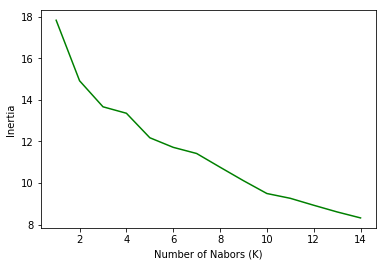

In [36]:
# dropping the neighbouhood coloumn to prepare for kmeans
torronto_grouped_clustering = torronto_grouped.drop('Neighbourhood', 1)

inertia=[]

for k in range (1,15):

    kmeans = KMeans(n_clusters=k, random_state=0).fit(torronto_grouped_clustering)
    inertia.append(kmeans.inertia_)

# plot : K vs Inertia
plt.plot(range(1,15),inertia,'g')
plt.ylabel('Inertia ')
plt.xlabel('Number of Nabors (K)')
plt.show


From the graph, it is not very clear what should be taken as k. Therefore, kneed - a python library - is used to find k (using Elbow method). 

In [37]:
#! pip install kneed
from kneed import KneeLocator

In [38]:
kn = KneeLocator(range(1,15),inertia, curve='convex', direction='decreasing')
print("Elbow Location is: ", kn.knee)

Elbow Location is:  5



# Therefore, we take k = 5.

In [39]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(torronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

torronto_merged = results

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
torronto_merged = torronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood', how='right')
torronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,Park,Construction & Landscaping,Food & Drink Shop,Yoga Studio,Deli / Bodega,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
1,M4A,North York,Victoria Village,43.725882,-79.315572,2,Intersection,Coffee Shop,Portuguese Restaurant,Financial or Legal Service,Hockey Arena,Yoga Studio,Distribution Center,Dim Sum Restaurant,Diner,Discount Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2,Coffee Shop,Park,Bakery,Pub,Café,Theater,Breakfast Spot,Gym / Fitness Center,Historic Site,French Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,2,Clothing Store,Accessories Store,Boutique,Shoe Store,Miscellaneous Shop,Furniture / Home Store,Event Space,Vietnamese Restaurant,Coffee Shop,Dessert Shop
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2,Coffee Shop,Diner,Sushi Restaurant,Yoga Studio,Hobby Shop,Sandwich Place,Smoothie Shop,Burrito Place,Distribution Center,Discount Store


Since geocoder was not giving a value for torronto's location, constant values found from the web are taken as latitue and longitude

In [42]:

latitude = 43.651924
longitude = -79.398262
print('The geograpical coordinate of Torronto are {}, {}.'.format(latitude, longitude))

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(torronto_merged['Latitude'], torronto_merged['Longitude'], torronto_merged['Neighbourhood'], torronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Torronto are 43.651924, -79.398262.
